In [14]:
import tensorflow as tf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

import gym
from gym import spaces
from gym.utils import seeding
from stable_baselines.common.env_checker import check_env
from stable_baselines import DQN
import numpy as np
from ads_utils import load_data, plot, Environment

from tqdm import tqdm

https://github.com/notadamking/Stock-Trading-Environment/blob/master/env/StockTradingEnv.py
The code follows some of this implementation. 


In [39]:
INITIAL_BALANCE = 10_000
PAST_TICKS = 5
        
'''NOTE: there is no train/test split yet'''            
train = load_data([2])      

fake = np.linspace(100, 200, len(train))
train['close1'] = fake
fake = np.linspace(200, 100, len(train))
train['close2'] = fake
fake = 10*np.sin(np.linspace(0, 3141.592, len(train))/50) + 20
train['close3'] = fake
fake = 100*np.sin(np.linspace(0, 3141.592, len(train))/50) + np.random.normal(1000, 50, len(train))
train['close4'] = fake
fake = np.random.normal(1000, 50, len(train))
train['close5'] = fake
fake = 1000 - np.abs(np.arange(0, len(train)) - len(train)/2) * 0.05
train['close6'] = fake
fake = np.random.normal(1000, 50, len(train)) - np.abs(np.arange(0, len(train)) - len(train)/2) * 0.05
train['close7'] = fake

envs = []
for col in ['close'] + [f'close{i}' for i in range(1, 8)]:
    data = train[col].to_list()
    i = int(0.8*len(data))
    env_train = Environment(data[:i], balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
    env_val   = Environment(data[i:], balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
    envs.append([env_train, env_val])

In [41]:
check_env(envs[0][0])

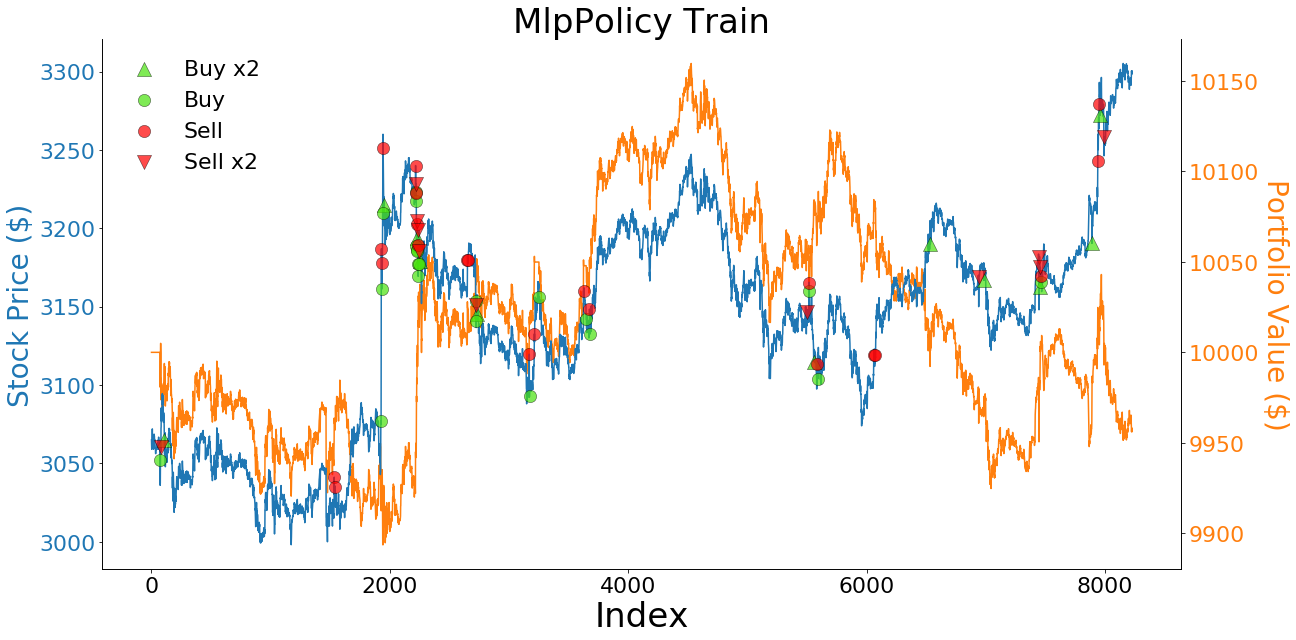

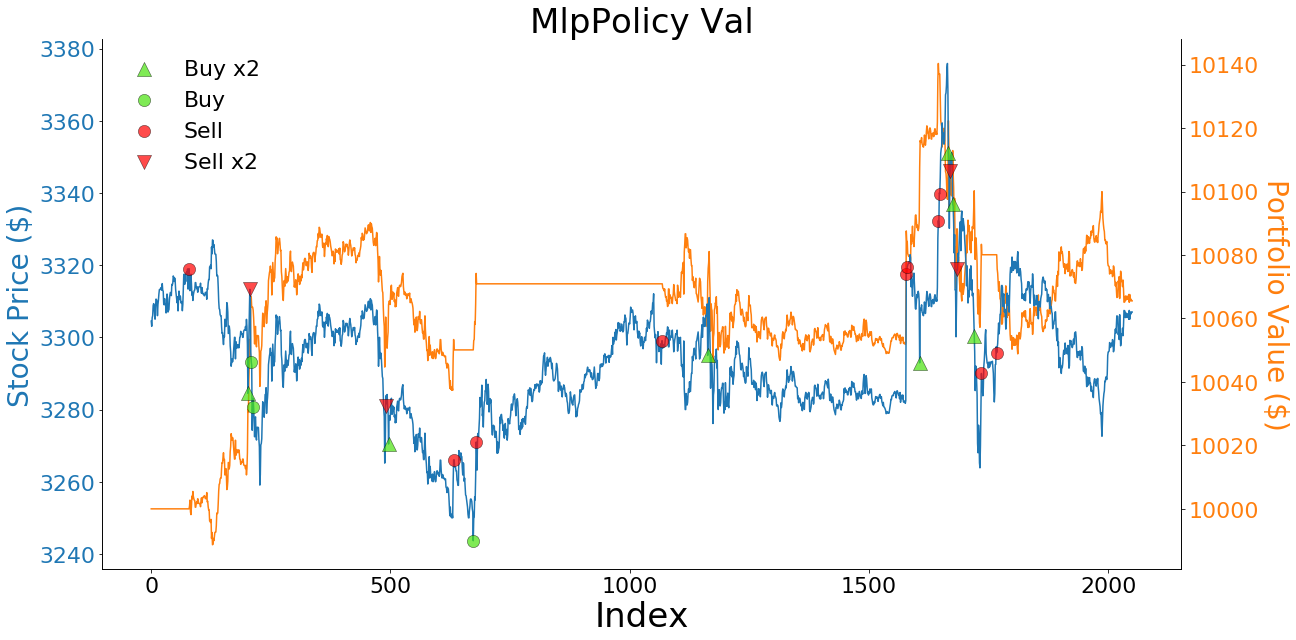

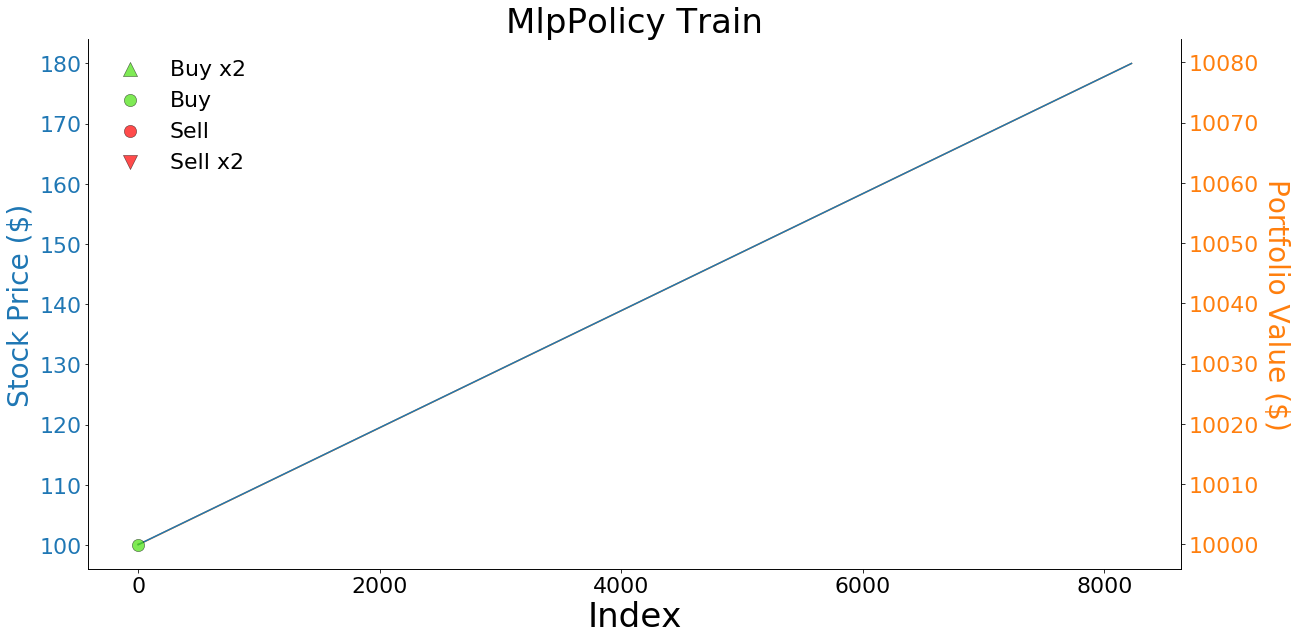

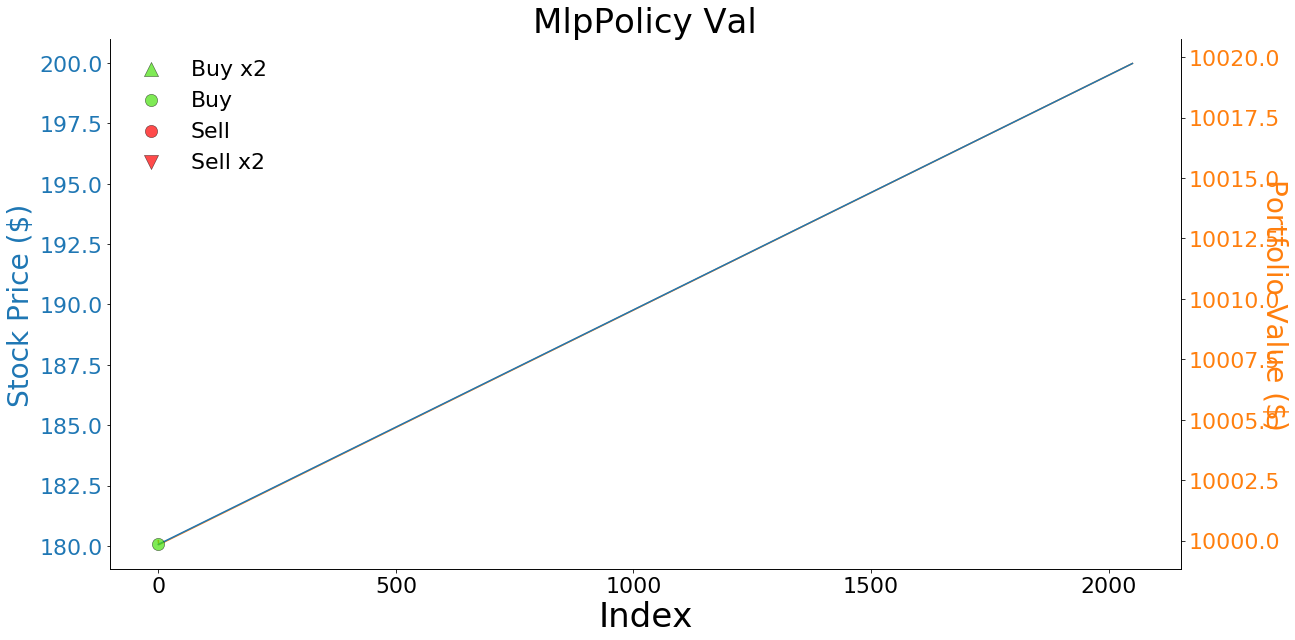

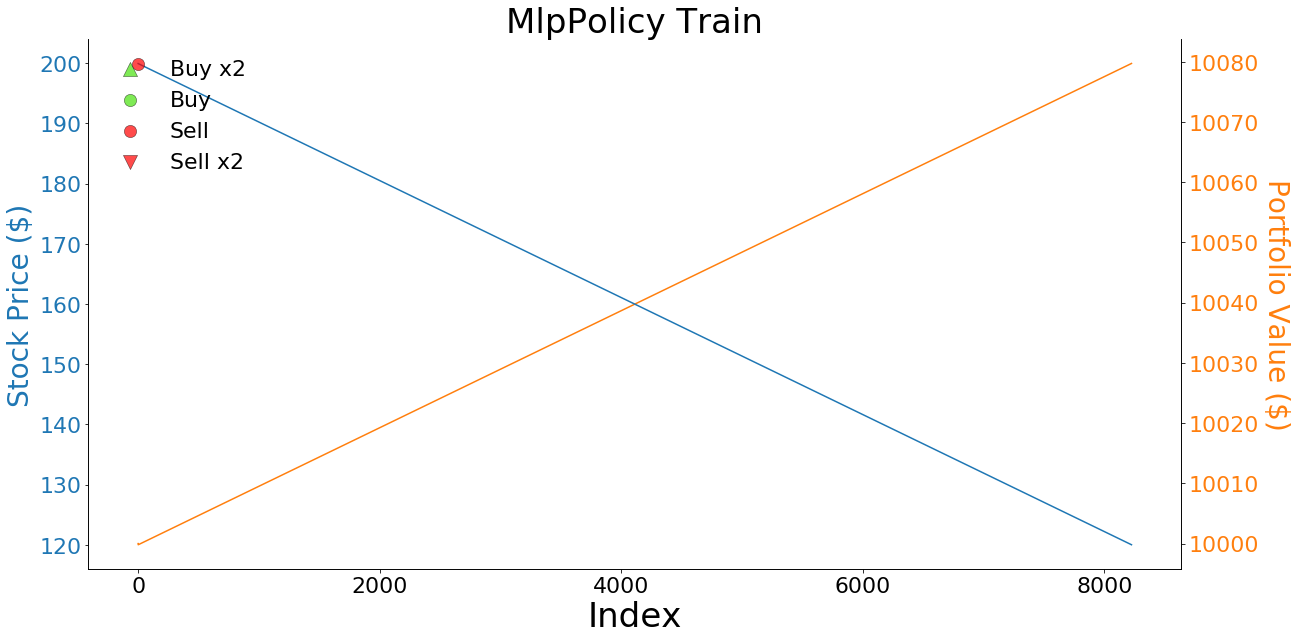

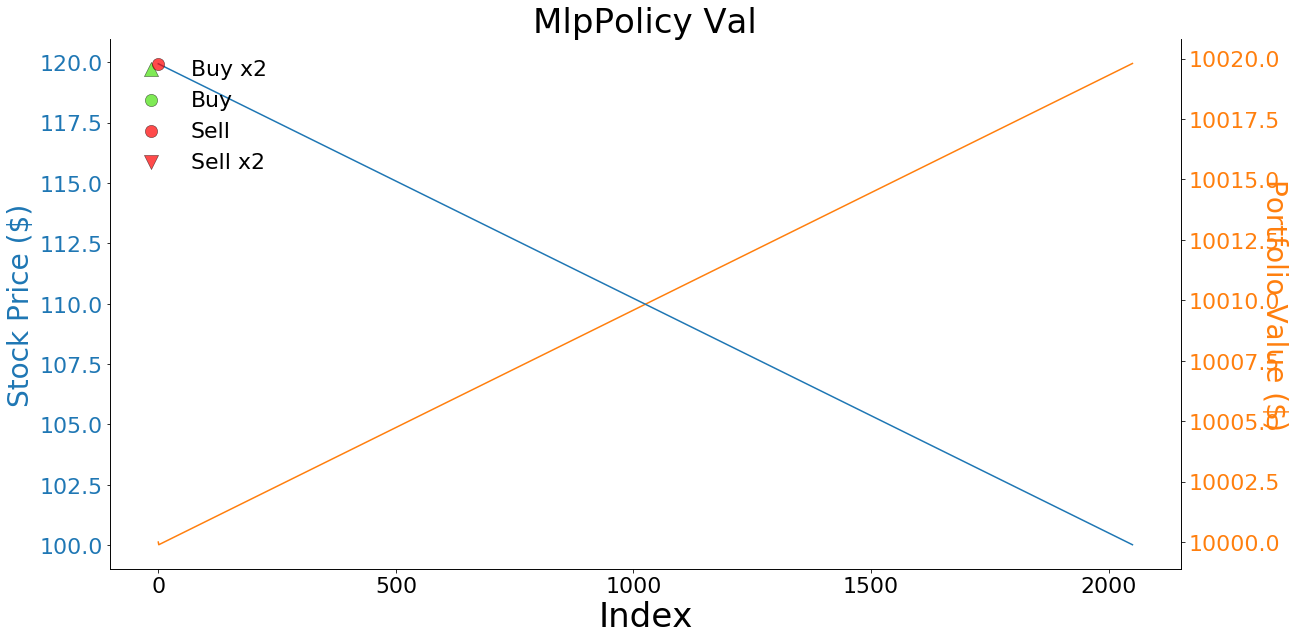

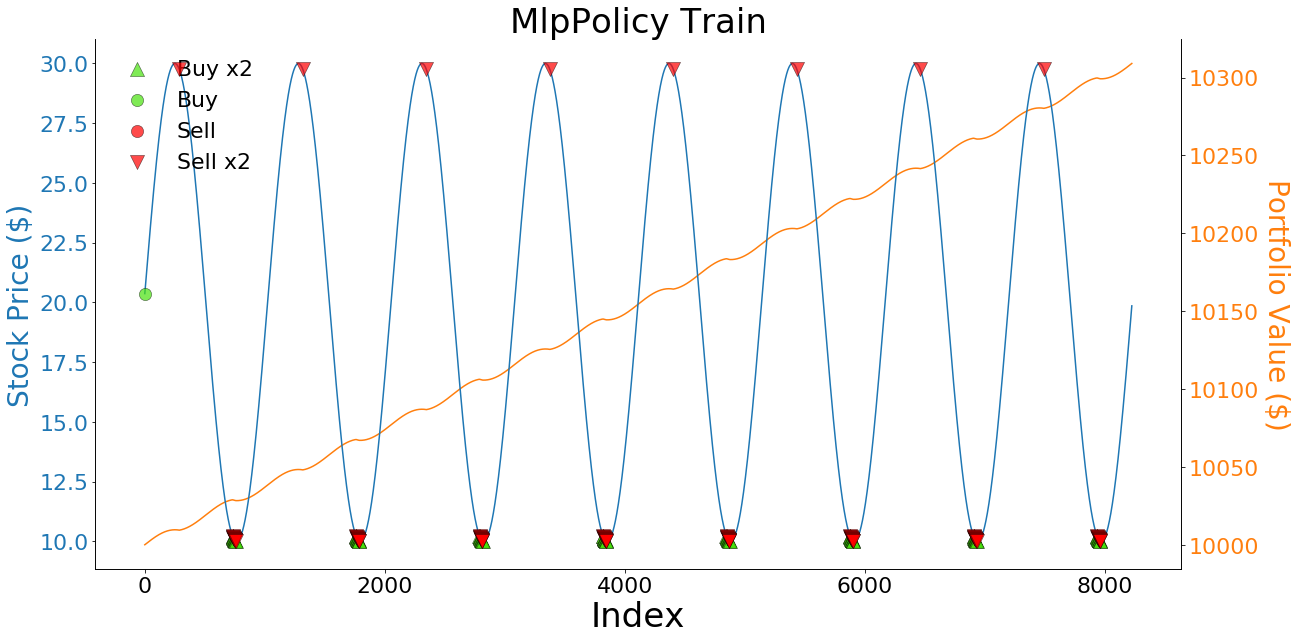

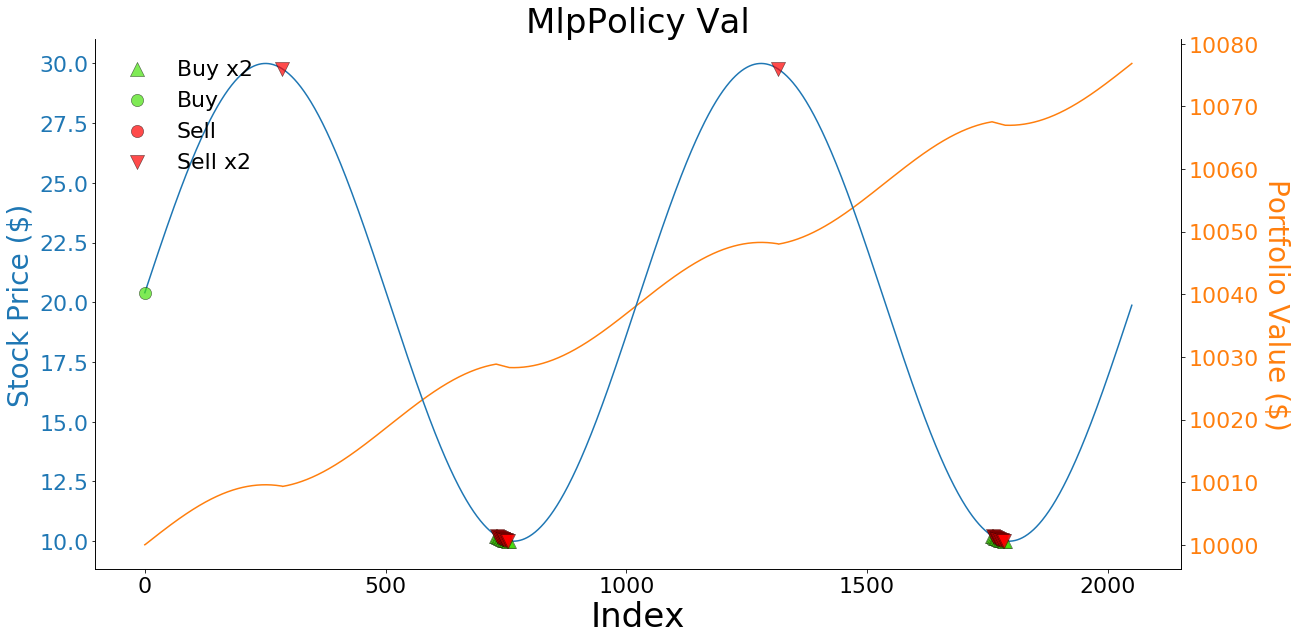

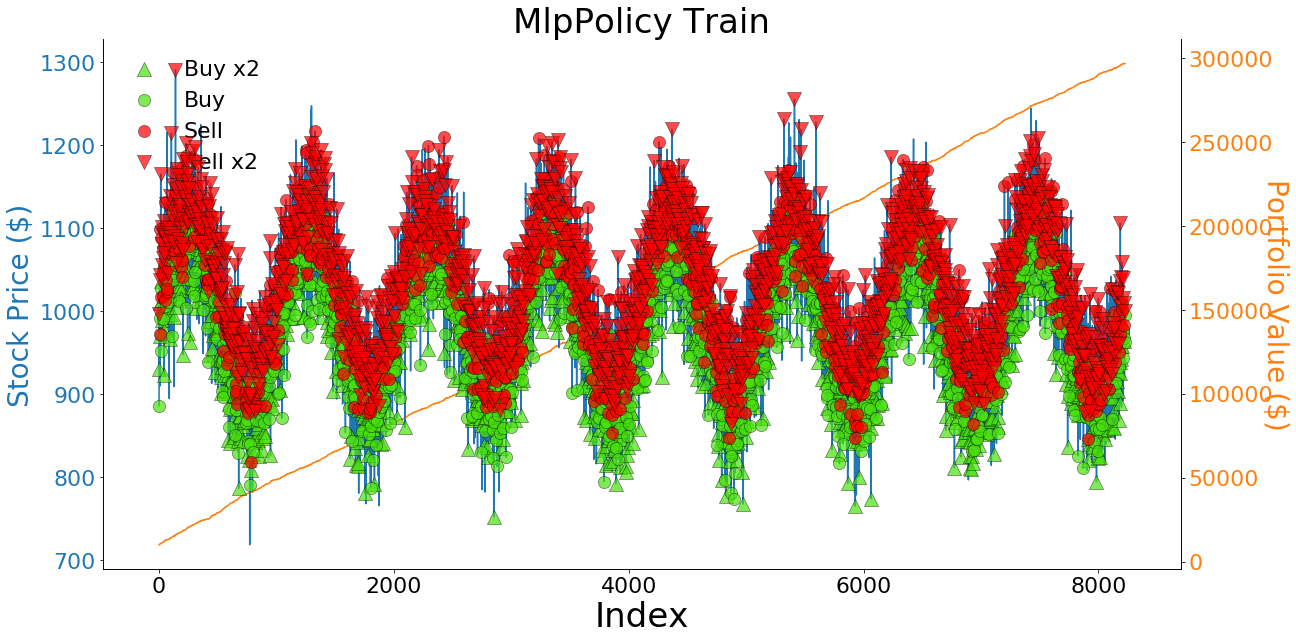

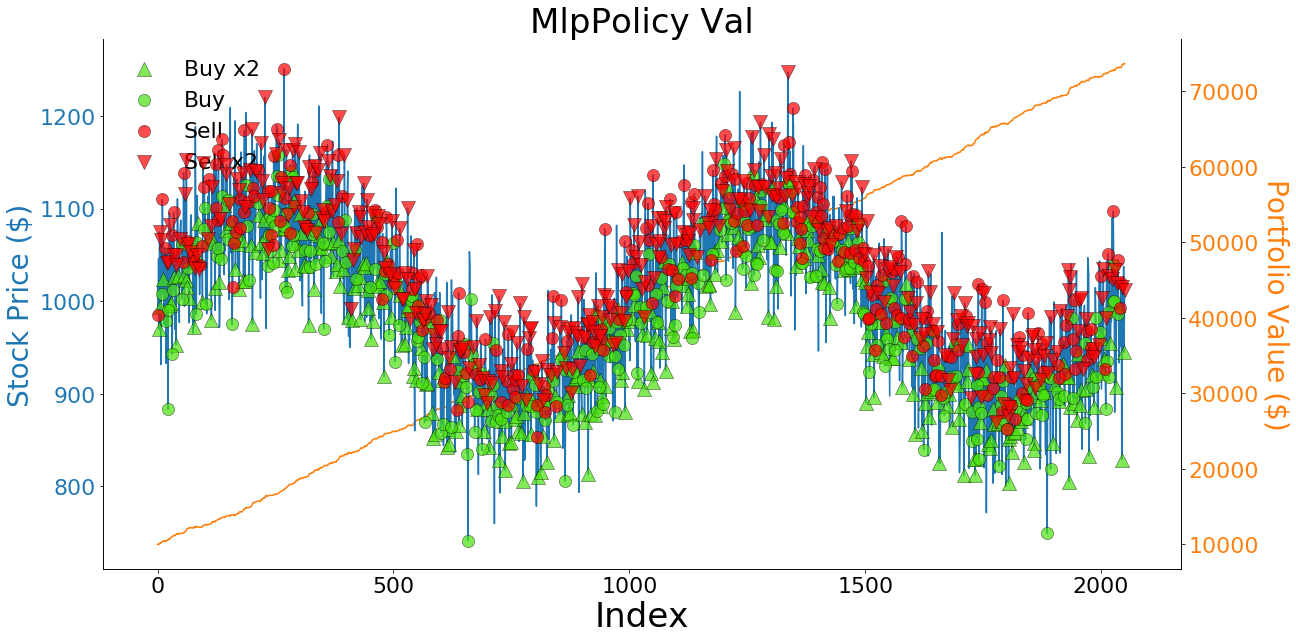

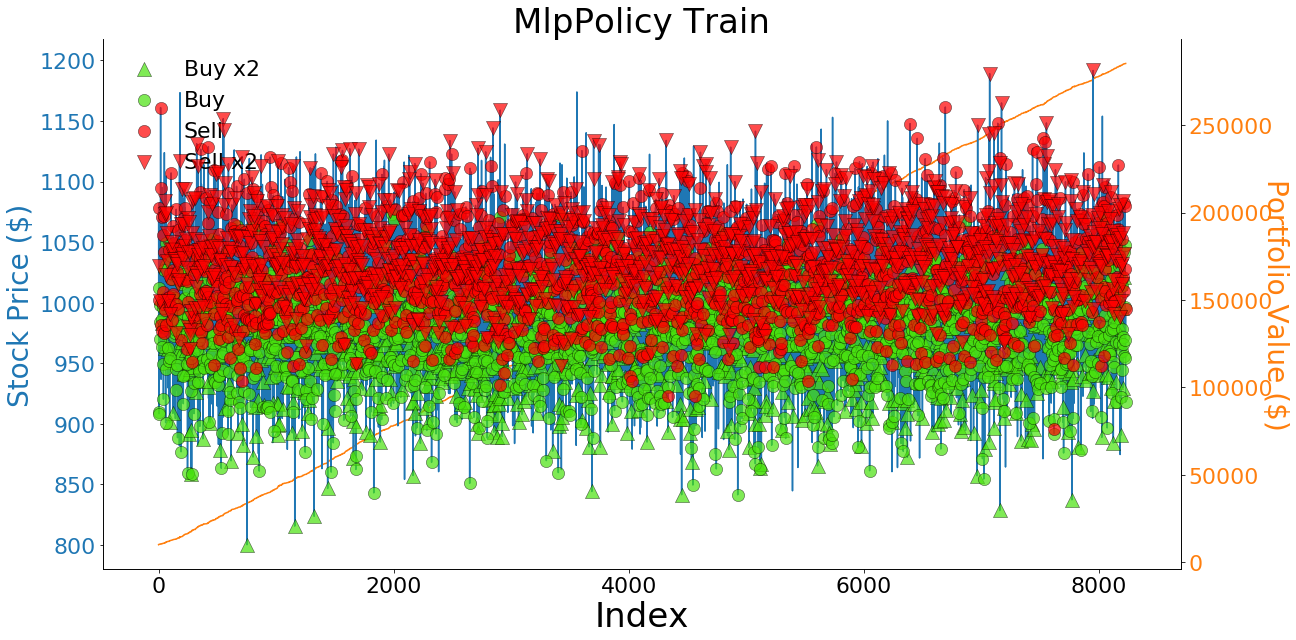

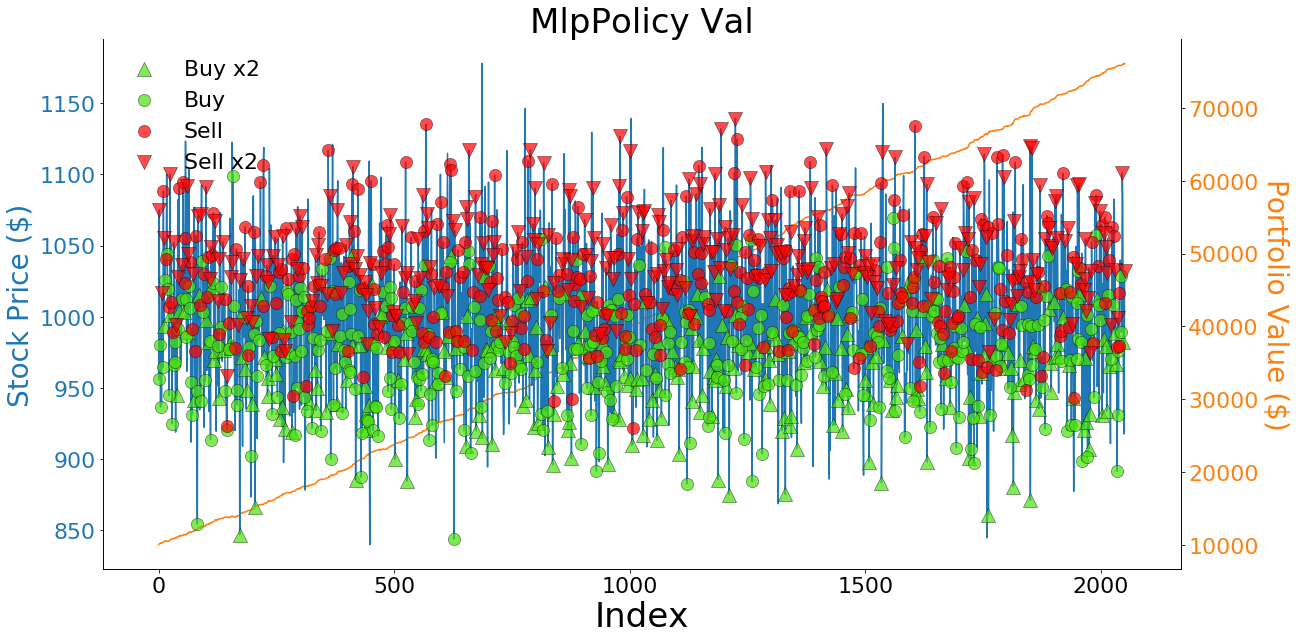

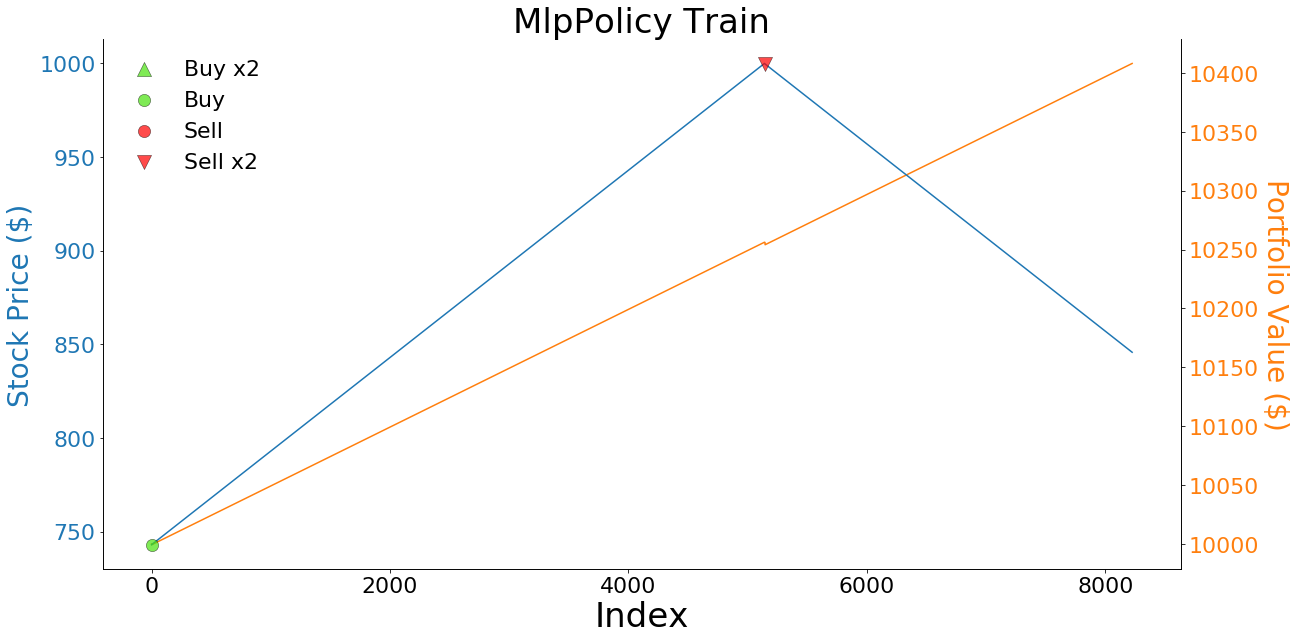

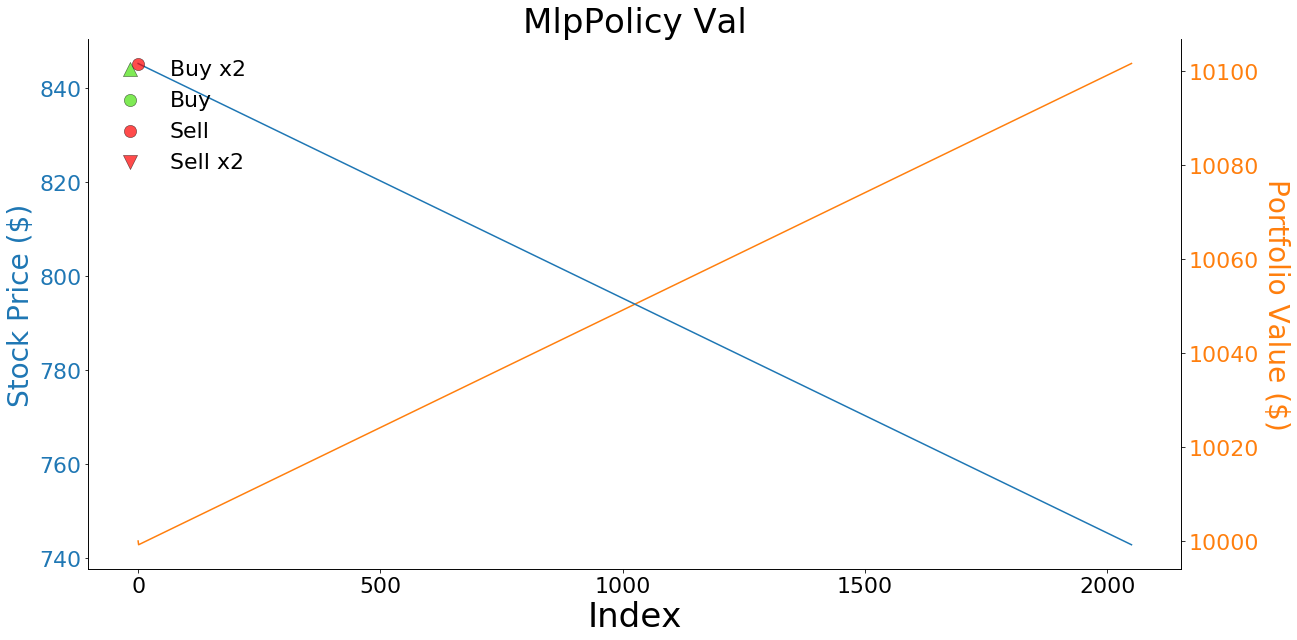

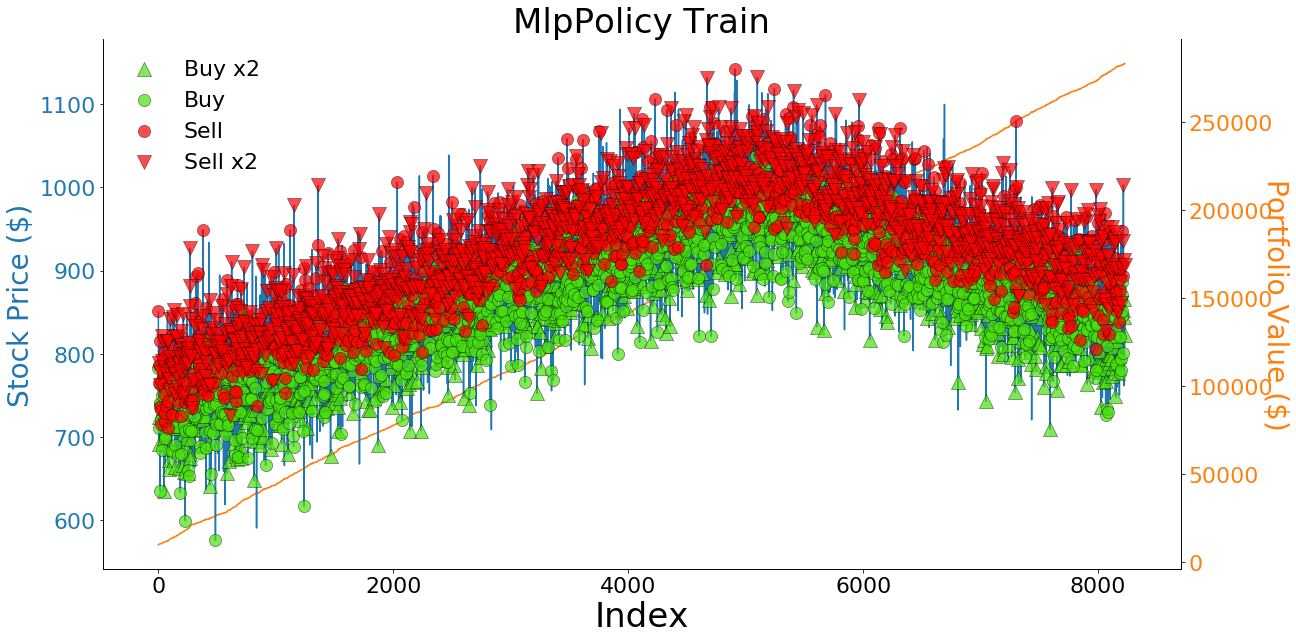

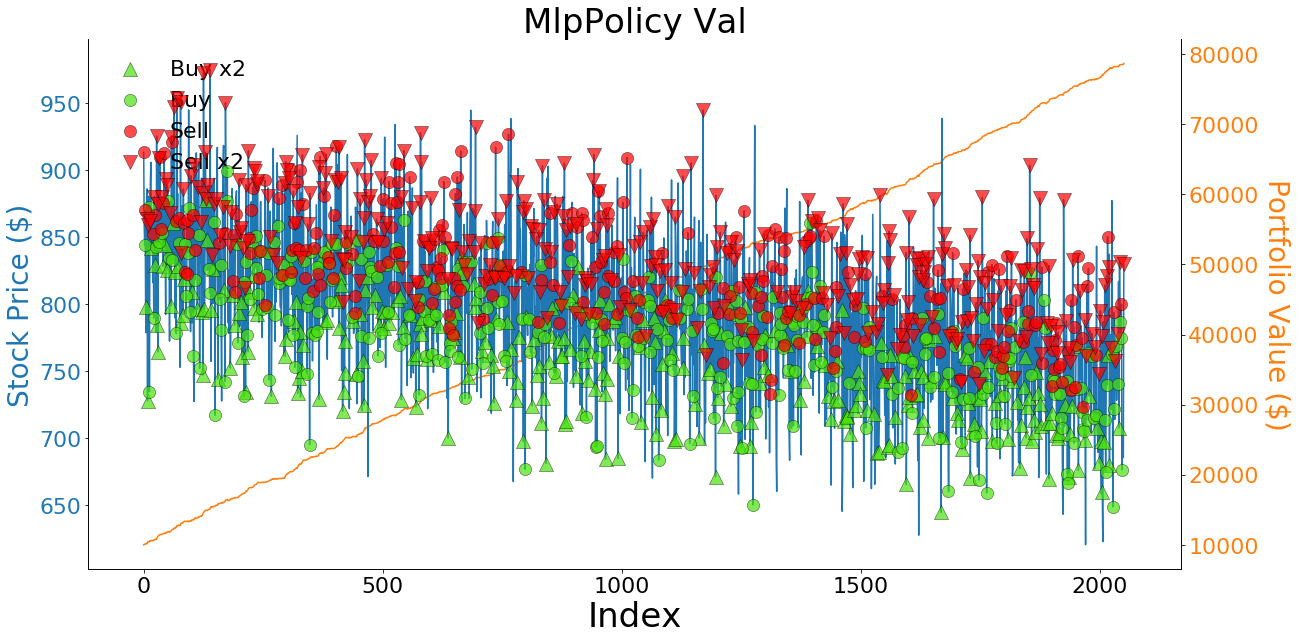

IndexError: list index out of range

In [42]:
%%time
# WARNING, WILL TAKE 1.5HRS TO RUN, REDUCE TOTAL TIMESTEPS FROM 1_000_000 FOR QUICKER TRAINING
for policy in ['MlpPolicy']:
    for env_train, env_val in envs:
        env_train.reset()

        model = DQN(policy, env_train)
        model.learn(total_timesteps=200_000, log_interval=1e9) 

        # Train
        state = env_train.reset()
        portfolio_values = []
        prices = []
        actions = []
        for i in range(10_000):
            action, _ = model.predict(state)

            price, portfolio_value = env_train.get_data()
            actions.append(action)
            prices.append(price)
            portfolio_values.append(portfolio_value)

            state, reward, done, _ = env_train.step(action)

            if done:
                break

        plot(prices, actions, portfolio_values, right_y_adjust=1.1, title=policy+' Train')
        
        
        # Val
        state = env_val.reset()
        portfolio_values = []
        prices = []
        actions = []
        for i in range(10_000):
            action, _ = model.predict(state)

            price, portfolio_value = env_val.get_data()
            actions.append(action)
            prices.append(price)
            portfolio_values.append(portfolio_value)

            state, reward, done, _ = env_val.step(action)

            if done:
                break
        
        plot(prices, actions, portfolio_values, right_y_adjust=1.1, title=policy+' Val')      

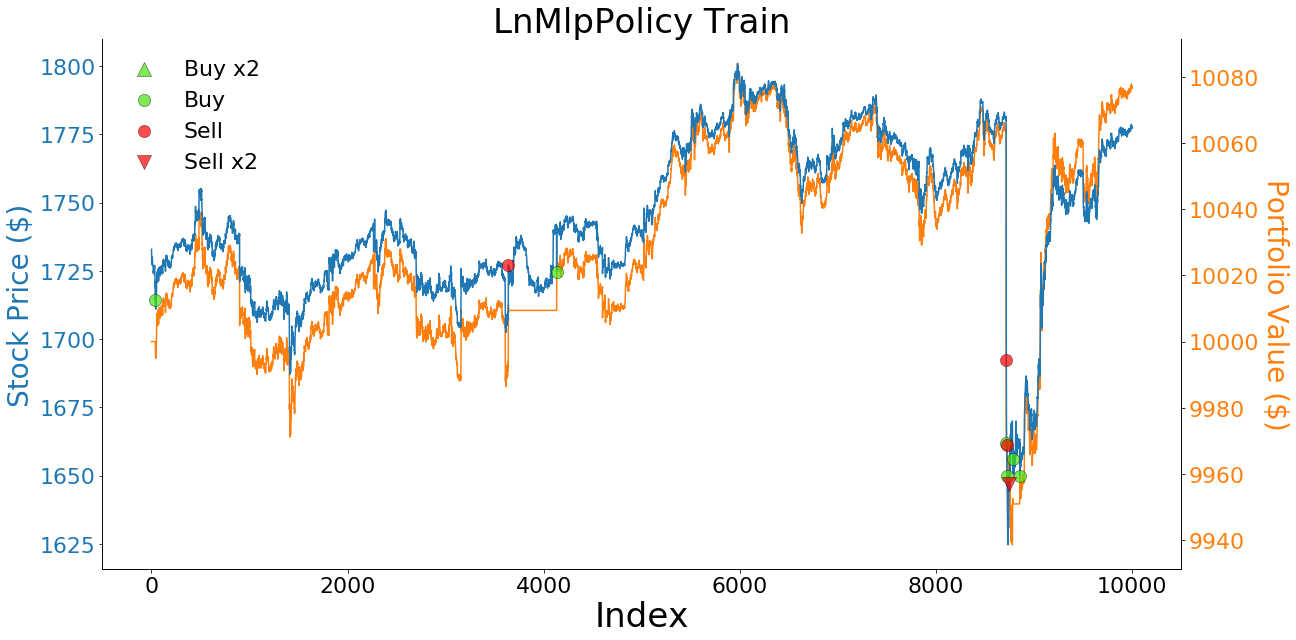

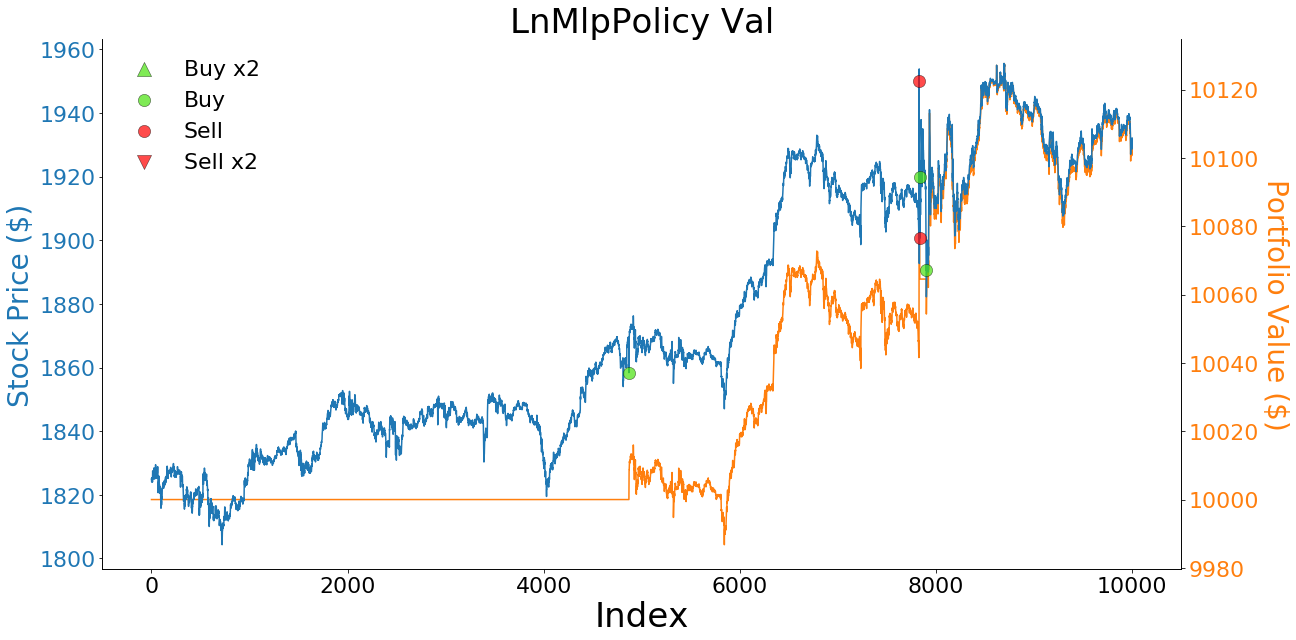

In [53]:
train = load_data(list(range(1,  13)))           
val   = load_data(list(range(13, 19)))

env_train = Environment(train.close.to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)
env_val   = Environment(val.close.to_list(), balance=INITIAL_BALANCE, past_ticks=PAST_TICKS)

env_train.reset()

model = DQN('MlpPolicy', env_train)
model.learn(total_timesteps=200_000, log_interval=1e9) 

# Train
state = env_train.reset()
portfolio_values = []
prices = []
actions = []
for i in range(10_000):
    action, _ = model.predict(state)

    price, portfolio_value = env_train.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env_train.step(action)

    if done:
        break

plot(prices, actions, portfolio_values, right_y_adjust=1.1, title=policy+' Train')


 # Val
state = env_val.reset()
portfolio_values = []
prices = []
actions = []
for i in range(10_000):
    action, _ = model.predict(state)

    price, portfolio_value = env_val.get_data()
    actions.append(action)
    prices.append(price)
    portfolio_values.append(portfolio_value)

    state, reward, done, _ = env_val.step(action)

    if done:
        break

plot(prices, actions, portfolio_values, right_y_adjust=1.1, title=policy+' Val')      

In [67]:
import numpy as np

X = np.array([[1,1,1,1,1,1], [1,2,3,4,5,6], [3,2,3,4,3,5]]).T
y = np.array([5, 20, 14, 32, 22, 38])

# coefficients
b = np.linalg.inv(X.T @ X) @ X.T @ y

# new prediction
np.array([[1], [4], [3]]).T @ b

array([23.15789474])

In [65]:
b

array([-2.05263158,  4.36842105,  2.57894737])